In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,76,1
1,117,64
2,10,64
3,118,56
4,2,34
...,...,...
1915,85,56
1916,58,50
1917,47,39
1918,48,63


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

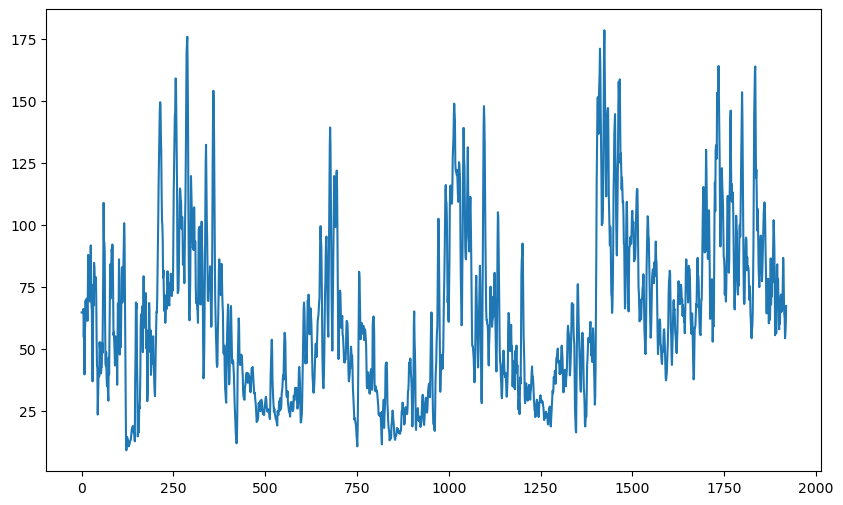

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[47.0338212 , 44.12689488],
       [54.30458752, 47.27798101],
       [60.50852843, 49.09584142],
       [62.92848611, 49.69313758],
       [64.30587969, 48.9916757 ],
       [64.8275281 , 48.03007584],
       [62.88625909, 46.68654527],
       [61.18682031, 44.88511019],
       [59.98678595, 44.39494161],
       [59.87478575, 44.33930115],
       [60.11491519, 44.09810208],
       [60.04324193, 43.70080531],
       [59.81248342, 44.0945869 ],
       [60.05083248, 44.04979255],
       [60.21843268, 43.8359515 ],
       [60.16476583, 43.30220669],
       [60.1410856 , 42.86832483],
       [59.8746866 , 42.15210218],
       [59.296964  , 41.42672245],
       [58.52852366, 40.8299796 ],
       [57.79690593, 40.54452567],
       [57.39366736, 40.46503729],
       [57.50986456, 40.36749329],
       [57.79503169, 40.40460057],
       [58.14388789, 40.32352506],
       [58.4957185 , 40.27485966],
       [58.70031596, 40.03793271],
       [58.57554957, 39.8820408 ],
       [58.37808122,

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[57.81626059, 47.83710612],
       [57.81626059, 47.83710612],
       [57.81626059, 47.83710612],
       [57.81626059, 47.83710612],
       [57.81626059, 47.83710612],
       [61.37500197, 48.61774231],
       [63.09133628, 48.49945516],
       [63.22699466, 47.65730891],
       [62.63865463, 46.59766972],
       [61.75243584, 45.66719481],
       [60.80991326, 44.88080006],
       [60.24130983, 44.28365207],
       [59.96644245, 44.12554741],
       [59.97925176, 44.0565176 ],
       [60.04798114, 43.95584767],
       [60.05795127, 43.79666859],
       [60.07752   , 43.63017249],
       [60.08996064, 43.24167555],
       [59.93918694, 42.71706153],
       [59.60120514, 42.11586715],
       [59.12763316, 41.56433095],
       [58.57814951, 41.08367344],
       [58.1051851 , 40.72675166],
       [57.80479864, 40.52232728],
       [57.72787149, 40.42103638],
       [57.867634  , 40.36710317],
       [58.12896372, 40.28168226],
       [58.34210072, 40.18459176],
       [58.45871063,

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[66.9004471  52.99084971]
 [68.65937406 51.00629187]
 [68.26341043 51.51552535]
 [69.34363066 49.41597801]
 [66.06963318 47.56294383]
 [64.94044844 46.80262167]
 [64.66611769 46.46698922]
 [64.35191015 45.54327594]
 [63.36242753 45.42996264]
 [62.81167221 46.61821219]
 [63.99302867 47.21188428]
 [63.98343157 47.56289924]
 [64.51615601 46.9061746 ]
 [63.89533981 46.53021448]
 [64.08437473 45.259776  ]
 [62.64866336 44.24950389]
 [62.01216216 43.14726169]
 [60.74312903 42.96127993]
 [60.67551231 42.63164473]
 [60.53183678 42.55086136]
 [60.94369443 42.36126286]
 [61.09764751 42.33783908]
 [61.49698866 42.20282225]
 [61.71912776 42.0337671 ]
 [61.56309957 41.93828196]
 [61.47773933 41.80627698]
 [61.23950151 41.70738265]
 [61.18838926 41.38650488]
 [60.78947596 41.1500498 ]
 [60.68738014 40.81066722]
 [60.39202881 40.62644217]
 [60.36864741 40.34996399]
 [60.1246181  40.22378671]
 [60.12985479 40.02874433]
 [60.03188545 39.88573877]
 [60.023

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 33.680150185214394

Testing MAE: 25.092293689219133

Testing MAPE: 26.725706712834473


In [15]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

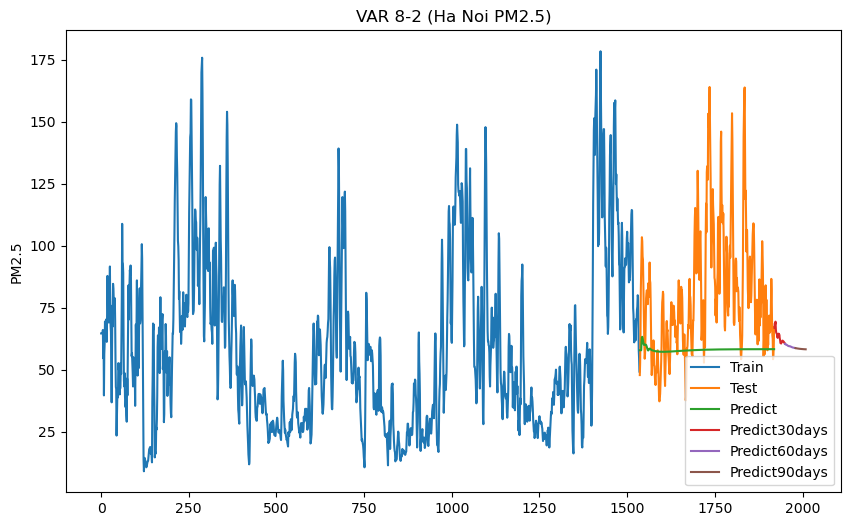

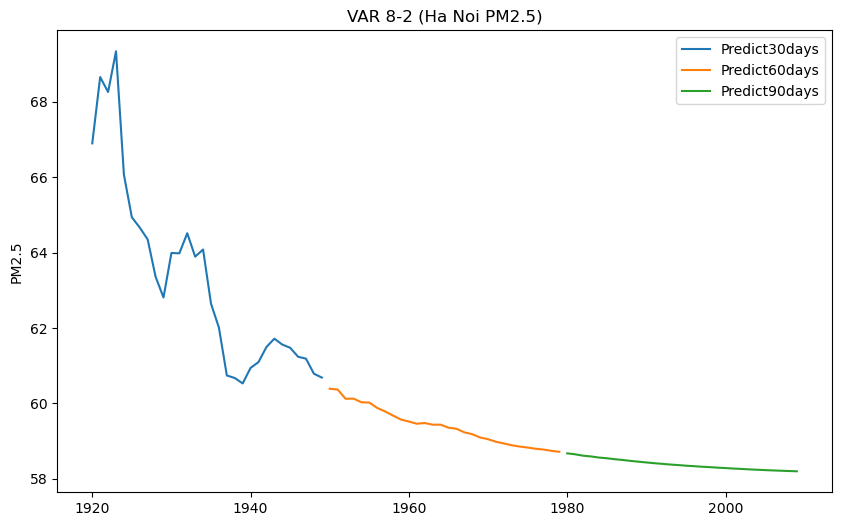

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()
